<a href="https://colab.research.google.com/github/arnaldobjunior/OpenCV/blob/main/OpenCV_do_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import imutils

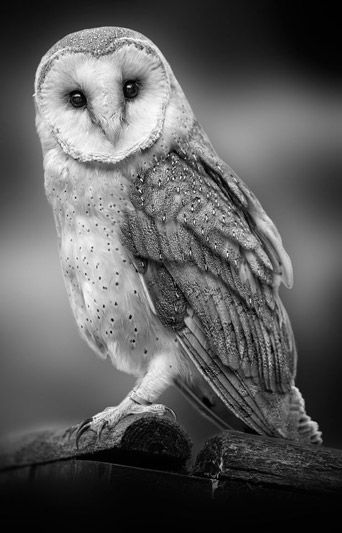

In [83]:
img = cv2.imread('index.jpeg',0)
cv2_imshow(img)

***Translation***





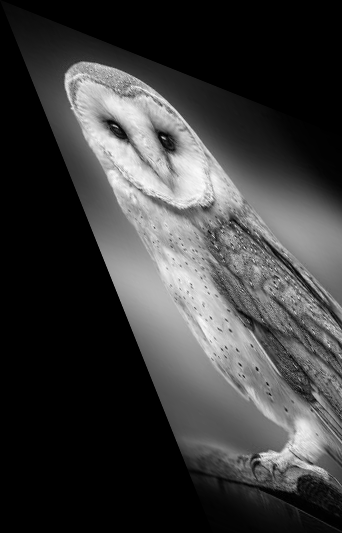

In [84]:
# [[size,rotation,location]x,[rotation,size,location]y]
M = np.float32([[1, 0.4, 0], [0.4, 1,0]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2_imshow(shifted)

***Rotation***

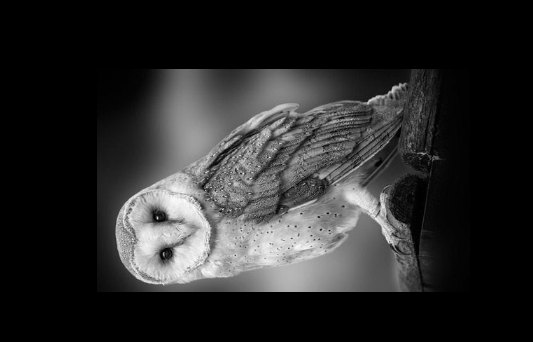

In [85]:
row,col = img.shape
center = row/2,col/2

#center, angle and scale
matrix = cv2.getRotationMatrix2D(center,90,0.7)
rotated = cv2.warpAffine(img,matrix,(row,col))
M = np.float32([[1, 0, -50], [0, 1,-50]])
rotated = cv2.warpAffine(rotated, M, (rotated.shape[1], rotated.shape[0]))
cv2_imshow(rotated)

***Cropping***

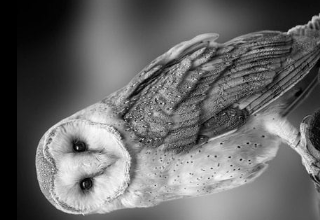

In [91]:
cv2_imshow(rotated[70:290,80:400])

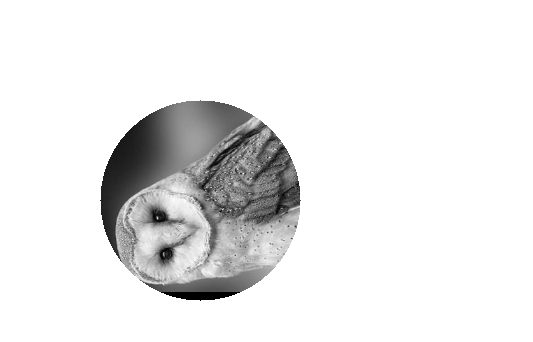

In [146]:
circle = np.zeros(rotated.shape[:2], np.uint8)
circle = cv2.circle(circle,(200,200),100,255, -1)

mask = np.ones_like(rotated) * 255
mask = cv2.bitwise_and(mask, rotated, mask=circle) +
       cv2.bitwise_and(mask, mask, mask=~circle)

cv2_imshow(mask)


***Thresholding***

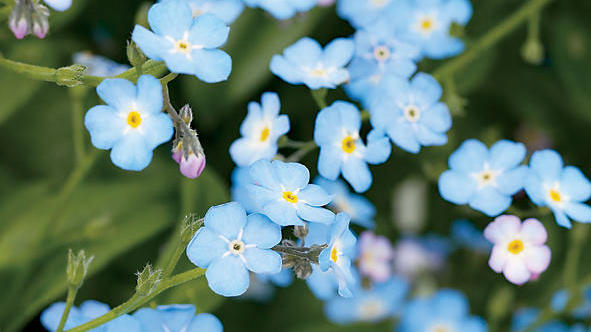

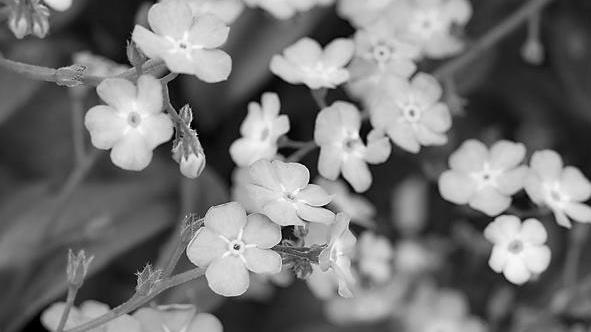

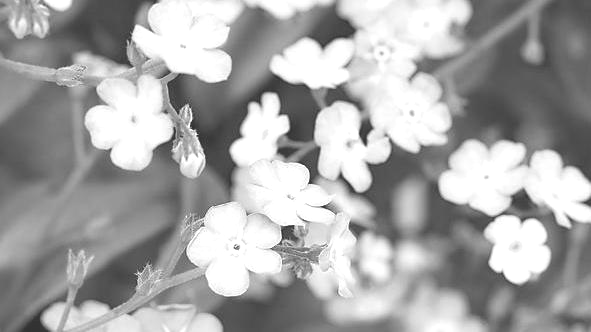

In [542]:
flower = cv2.imread('flower.jpeg',-1)
cv2_imshow(flower)

flower = cv2.cvtColor(flower,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(flower,(5,5),0)
cv2_imshow(flower)

M = np.ones(flower.shape, dtype = "uint8") * 100
flower = cv2.add(flower, M)
cv2_imshow(added)



*   Simple thresholding






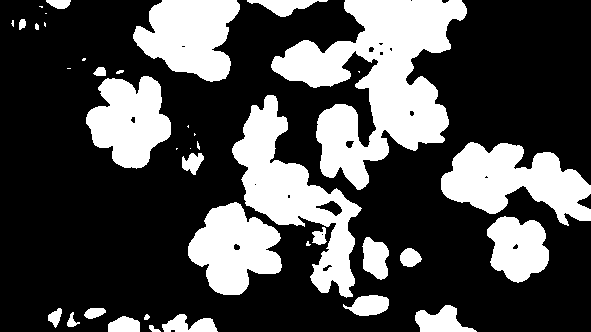

In [543]:
# if any pixel value is greater than 155 is set to 255
# if any pixel value is less than 155 is set to 0
(T,thresh) = cv2.threshold(blurred,170,255,cv2.THRESH_BINARY)
cv2_imshow(thresh)



*   Adaptative thresholding



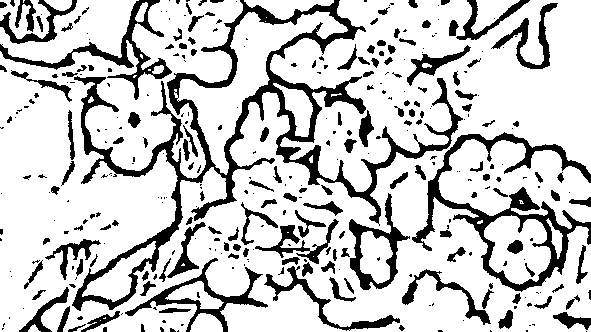

In [460]:
thresh = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,4)
cv2_imshow(thresh)

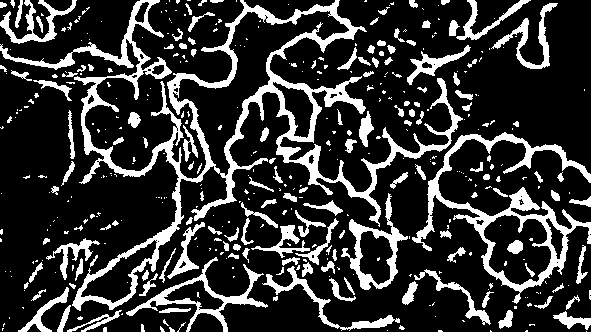

In [457]:
thresh = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,15,3)
cv2_imshow(thresh)